In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [11]:
cd

/Users/nishthachhabra


In [16]:
winemag = pd.read_csv("Desktop/DataScience/Personal Projects/archive (2)/winemag-data_first150k.csv")
winemag2 = pd.read_csv("Desktop/DataScience/Personal Projects/archive (2)/winemag-data-130k-v2.csv")
wine = pd.concat([winemag,winemag2],axis=0)

In [18]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [21]:
wine.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,280901,NaN,NaN,NaN,70615.7,41214.4,0,35112,70225,105337,150929
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,280900,756,Pinot Noir,27563,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
wine.isna().sum()

Unnamed: 0                    0
country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

In [23]:
wine=wine.dropna()

In [24]:
wine.isna().sum()

Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
variety                  0
winery                   0
taster_name              0
taster_twitter_handle    0
title                    0
dtype: int64

In [25]:
wine = wine[wine.duplicated('description', keep=False)]

In [26]:
wine

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Cabernet Sauvignon,Kirkland Signature,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Merlot,Bianchi,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...
152,152,US,"From a promising new project, the nose of this...",Estate Reserve,91,55.0,California,Carmel Valley,Central Coast,Pinot Noir,Albatross Ridge,Matt Kettmann,@mattkettmann,Albatross Ridge 2012 Estate Reserve Pinot Noir...
153,153,US,"Dark and thick in the glass, this wine shows s...",Old 900,91,46.0,California,Paso Robles,Central Coast,Syrah,Alta Colina,Matt Kettmann,@mattkettmann,Alta Colina 2012 Old 900 Syrah (Paso Robles)
168,168,US,"A fairly elegant expression of the variety, th...",Rector Creek Vineyard,91,95.0,California,Napa Valley,Napa,Merlot,Duckhorn,Virginie Boone,@vboone,Duckhorn 2012 Rector Creek Vineyard Merlot (Na...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129775,129775,US,"Picturesque with a crystalline salmon color, i...",Dianthus Estate Mourvèdre-Grenache-Counoise,87,27.0,California,Paso Robles,Central Coast,Rosé,Tablas Creek,Matt Kettmann,@mattkettmann,Tablas Creek 2013 Dianthus Estate Mourvèdre-Gr...
129878,129878,US,"Light in color and nuanced in oak, this full-b...",Dutton Ranch,90,46.0,California,Russian River Valley,Sonoma,Chardonnay,MacRostie,Virginie Boone,@vboone,MacRostie 2014 Dutton Ranch Chardonnay (Russia...
129879,129879,US,"This wine is a blend of 45% Grenache, 37% Syra...",Metis,90,20.0,Washington,Columbia Valley (WA),Columbia Valley,Red Blend,Maison Bleue,Sean P. Sullivan,@wawinereport,Maison Bleue 2013 Metis Red (Columbia Valley (...
129882,129882,US,"This wine is mostly Cabernet Sauvignon (78%), ...",Reserve,90,60.0,Washington,Columbia Valley (WA),Columbia Valley,Bordeaux-style Red Blend,Matthews,Sean P. Sullivan,@wawinereport,Matthews 2012 Reserve Red (Columbia Valley (WA))


In [27]:
dp = wine[['description','points']]

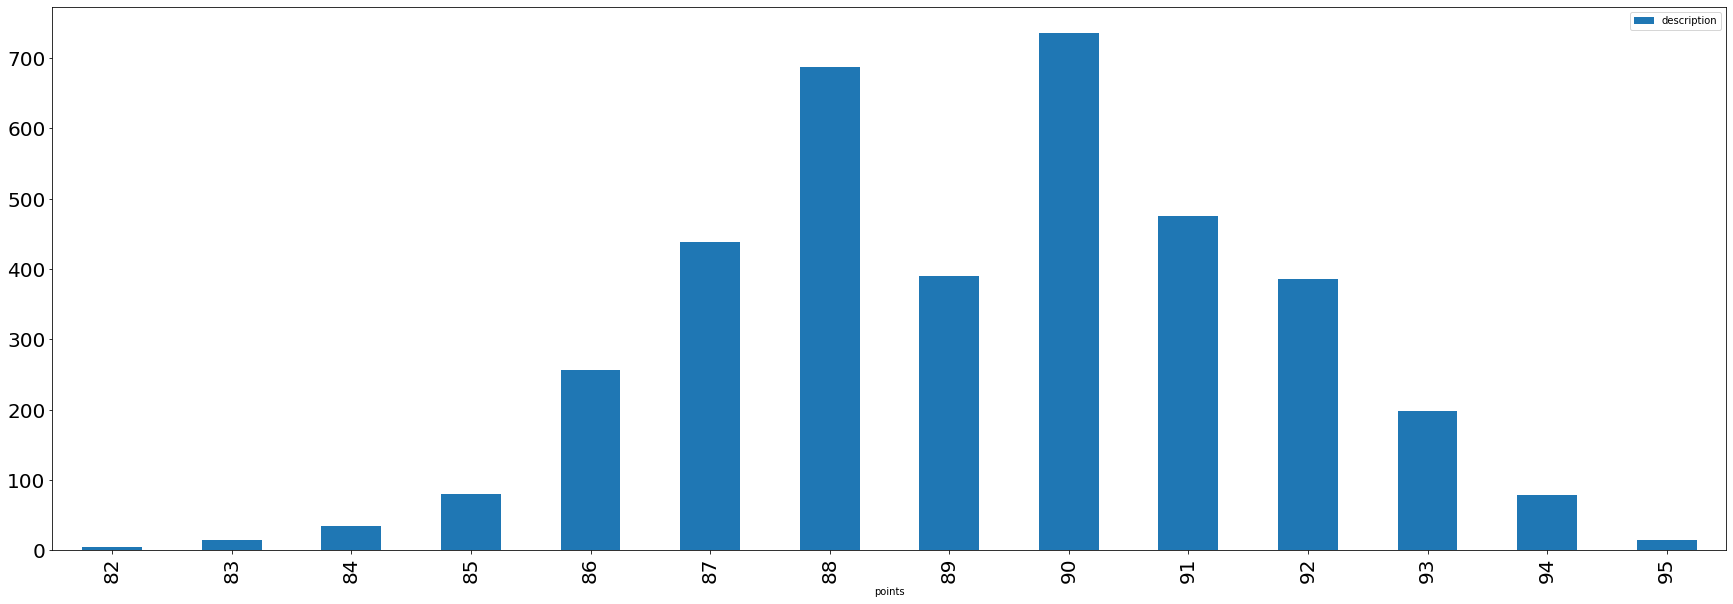

In [33]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20)
dp.groupby("points").agg({"description": "count"}).plot(ax=ax, kind='bar')

In [34]:
dp = dp.assign(description_length = dp['description'].apply(len))
dp.info()
dp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 10 to 129913
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         3790 non-null   object
 1   points              3790 non-null   int64 
 2   description_length  3790 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 118.4+ KB


,description,points,description_length
10,"Soft, supple plum envelopes an oaky structure ...",87,243
23,This wine from the Geneseo district offers aro...,87,251
152,"From a promising new project, the nose of this...",91,351
153,"Dark and thick in the glass, this wine shows s...",91,355
168,"A fairly elegant expression of the variety, th...",91,276


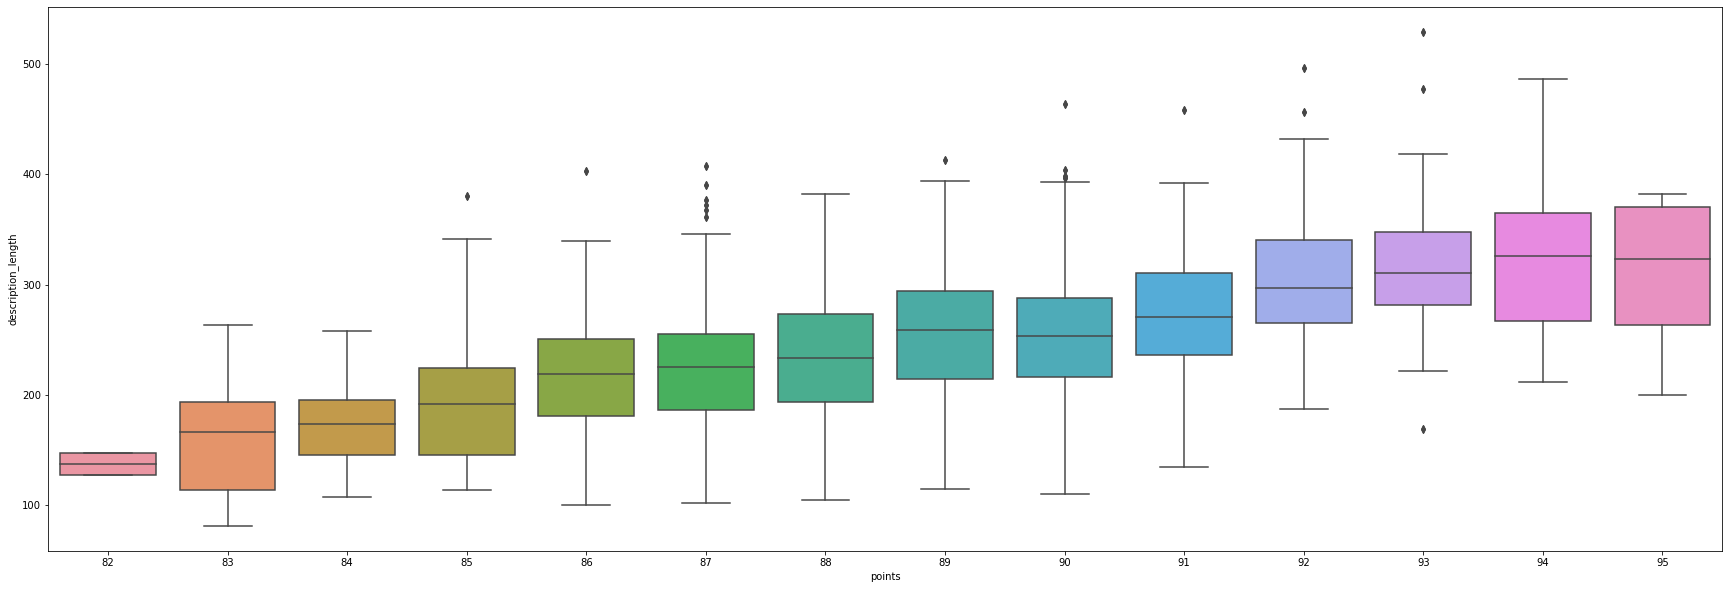

In [35]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points',y='description_length',data=dp)
plt.show()

In [ ]:
#Having too many different possibility for "points" would burden our model. 
#A 90 points wine is not that different from a 91 points wine, the description is probably not that
#different also. We can this throughout the descriptions' length as well.

In [ ]:
def transform_points_simplified(points):
    if points < 84:
        return 1
    elif points >= 84 and points < 88:
        return 2 
    elif points >= 88 and points < 92:
        return 3 
    elif points >= 92 and points < 96:
        return 4 
    else:
        return 5

In [36]:
def transform_points_simplified(points):
    if points < 85:
        return 1
    elif points>=85 and points <90:
        return 2
    elif points >=90 and points <95:
        return 3
    elif points >=95 and points <99:
        return 4
    else:
        return 5

In [40]:
dp=dp.assign(wine_points=dp['points'].apply(transform_points_simplified))
dp

,description,points,description_length,wine_points
10,"Soft, supple plum envelopes an oaky structure ...",87,243,2
23,This wine from the Geneseo district offers aro...,87,251,2
152,"From a promising new project, the nose of this...",91,351,3
153,"Dark and thick in the glass, this wine shows s...",91,355,3
168,"A fairly elegant expression of the variety, th...",91,276,3
...,...,...,...,...
129775,"Picturesque with a crystalline salmon color, i...",87,407,2
129878,"Light in color and nuanced in oak, this full-b...",90,279,3
129879,"This wine is a blend of 45% Grenache, 37% Syra...",90,349,3
129882,"This wine is mostly Cabernet Sauvignon (78%), ...",90,247,3


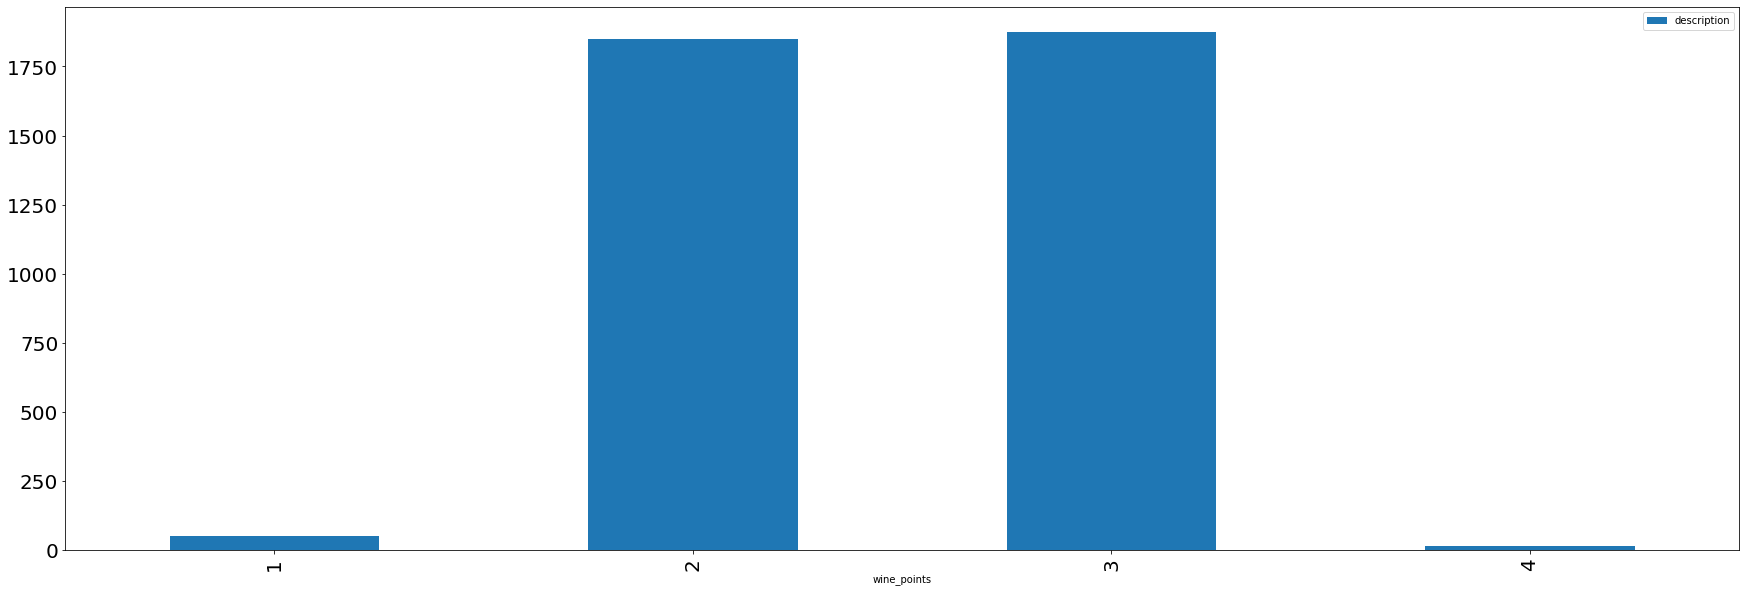

In [44]:
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20)
dp.groupby("wine_points").agg({"description":"count"}).plot(ax=ax, kind='bar')

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
X = dp['description']
y = dp['wine_points']

vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9996701846965699
0.9630606860158312


In [75]:
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.94      0.99      0.96       363
           3       0.99      0.94      0.96       383
           4       1.00      1.00      1.00         1

    accuracy                           0.96       758
   macro avg       0.98      0.98      0.98       758
weighted avg       0.96      0.96      0.96       758

